In [16]:
import numpy as np

from matplotlib import pyplot as plt
from citk.layer import Dense, Fuzzify
from citk.model import FFN
from citk.functions import ReLU, Linear, BellMembership, GaussianMembership, Sum
from citk.losses import MSE
from citk.optimisers import SGDOptimizer

from utils import get_and_process_boston_dataset, visualise_boston, seed_everything, get_and_process_load_diabetes

%matplotlib inline

ImportError: cannot import name 'get_and_process_load_diabetes' from 'utils' (/Users/pavloboiko/python_notebook/Neural_Net_Genetic_Alg-main-2/utils.py)

In [2]:
import citk 

ModuleNotFoundError: No module named 'citk'

# Data

/Users/pavloboiko/.local/share/virtualenvs/python_notebook-Zis-PRDe/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alt

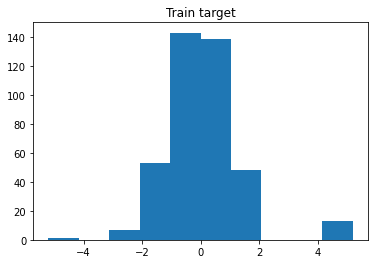

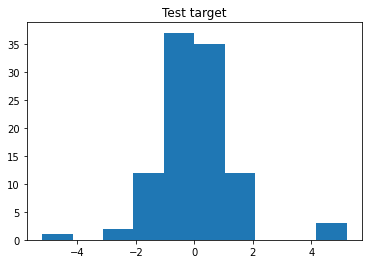

In [11]:
RANDOM_SEED = 42

seed_everything(RANDOM_SEED)

X_train, X_test, y_train, y_test = get_and_process_boston_dataset(random_state=RANDOM_SEED)

visualise_boston(X_train, X_test, y_train, y_test)

# Create Model

In [12]:
model = FFN(
    input_shape=X_train.shape[1], 
    layer_specs=[
        Fuzzify(16, msf=BellMembership, nonlinearity=Sum),
        #Fuzzify(32, msf=BellMembership),
        #Fuzzify(1, msf=BellMembership)
    ], 
    loss=MSE, 
)

## Train Model

In [13]:
trained, history = model.fit(
    train_sample=(X_train, y_train),
    validation_sample=(X_test, y_test),
    optimiser=SGDOptimizer(alpha=0.01),
    batch_size=32,
    epochs=7_000,
    verbose=False
)

# Predict and Visualise losses

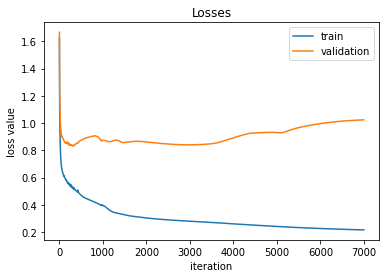

In [6]:
plt.title('Losses')
plt.plot(history['train_loss'], label='train')
plt.plot(history['validation_loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [7]:
prediction = trained.predict(X_test)
prediction_train = trained.predict(X_train)

print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 0.8327954489607151
Train MSE: 0.5089146241071644


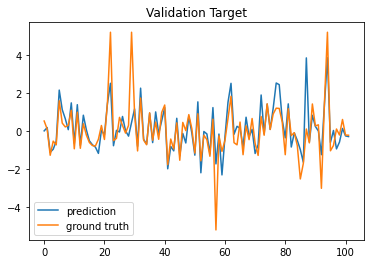

In [8]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

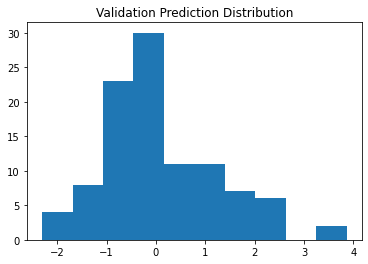

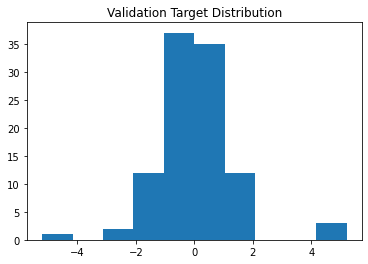

In [9]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
plt.show()